In [4]:
import warnings

warnings.filterwarnings(action='ignore')

# 선형 모델(Linear Models)
- 선형모델은 과거부터 지금까지 널리 사용되고 연구되고 있는 기계학습 방법
- 선형모델은 입력데이터에 대한 선형함수를 만들어 예측 수행
- 회귀분석을 위한 선형 모델은 다음과 같이 정의

$$ \hat{y}(w,x) = w_0 + w_1x_1 + ...+w_px_p $$

- x : 입력 데이터
- w : 모델이 학습할 파라미터
- $w_0$ : bias(편향)
- $w_1$ ~ $w_p$ : weight(가중치)

## 선형 회귀(Linear Regression)
- **선형 회귀(Linear Regression)** 또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
- 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화하는 학습 파라미터 w를 찾음
- 평균제곱오차는 아래와 같이 정의

$$ MSE = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_i})^2 $$

- y: 정답
- $\hat{y}$ : 예측 값

- 선형회귀모델에서 사용하는 다양한 오류 측정 방법
    - MAE(Mean Absolute Error)
    - MAPE(Mean Absolute Percentage Error)
    - MSE(Mean Squared Error)
    - MPE(Mean Percentage Error)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

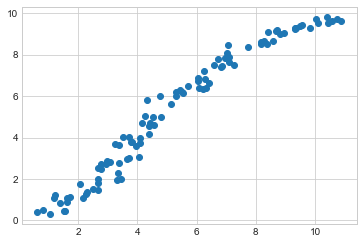

In [120]:
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100,1)) + noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X,y)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [122]:
print('선형 회귀 가중치 : {}'.format(model.coef_))
print('선형 회귀 편향 : {}'.format(model.intercept_))

선형 회귀 가중치 : [1.06025674]
선형 회귀 편향 : -0.3108320398968454


In [123]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.9491672730033988
평가 데이터 점수 : 0.9639464321483298


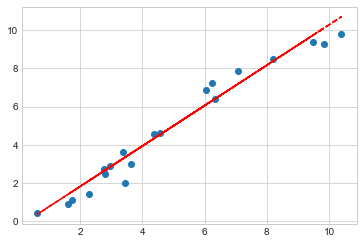

In [124]:
predict = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r')

### 보스턴 주택 가격 데이터
- 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
- 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StaLib 라이브러리에서 가져온 것
- 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

|속성|설명|
|:---|:---|
|CRIM|자치시(town)별 1인당 범죄율|
|ZN|25,000 평방 피트가 넘는 거주지역 토지 비율|
|INDUS|자치시(town)별 비소매 상업지역 토지 비율|
|CHAS|찰스 강(Charies River)에 대한 변수(강의 경계에 위치하면 1, 그렇지 않으면 0|
|NOX|10,000,000당 일산화질소 농도|
|RM|주택 1가구당 평균 방의 수|
|AGE|1940년 이전에 건축된 소유주택 비율|
|DIS|5개의 보스턴 고용센터까지의 가중 거리|
|RAD|방사형 고속도로 접근성 지수|
|TAX|10,000 달러당 재산 비율|
|PTRATIO|자치시(town)별 학생/교사 비율|
|B|1000(Bk-0.63)^2, Bk:자치시별 흑인 비율|
|LSTAT|모집단의 하위계층 비율(%)|
|MEDV|소유자가 거주하는 주택가격(중앙값)(단위:1,000달러)|

In [125]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

In [126]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [127]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

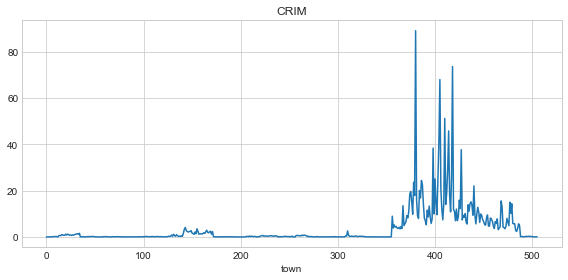

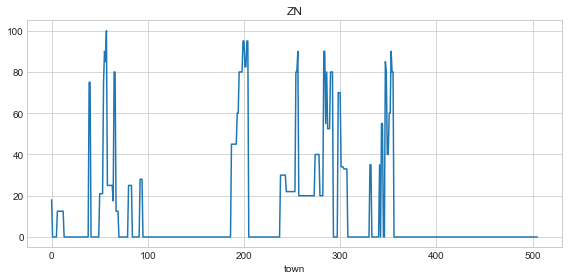

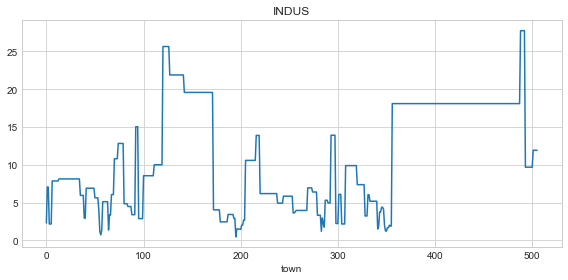

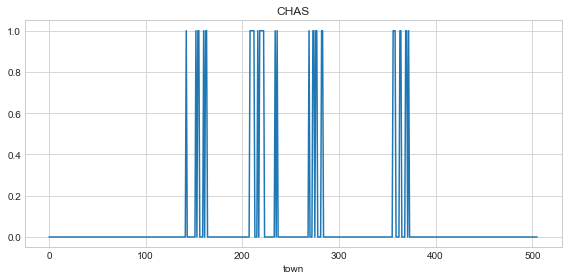

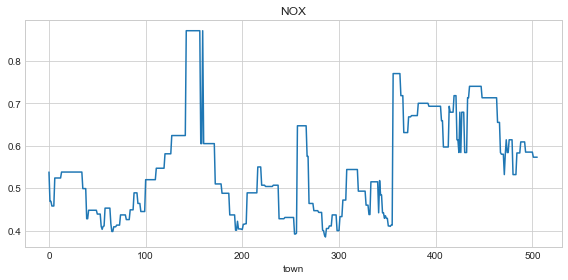

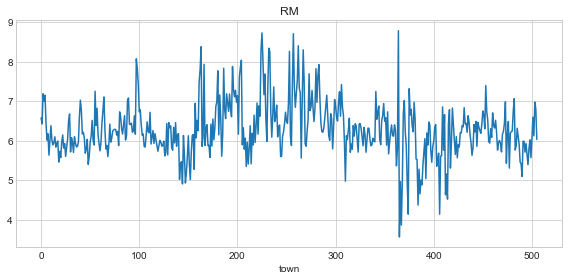

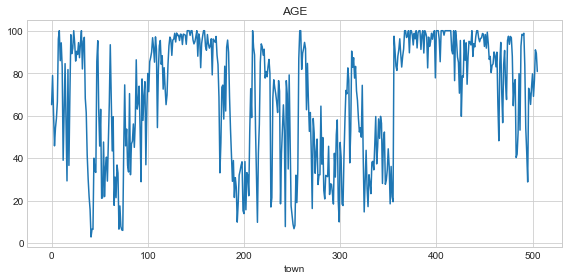

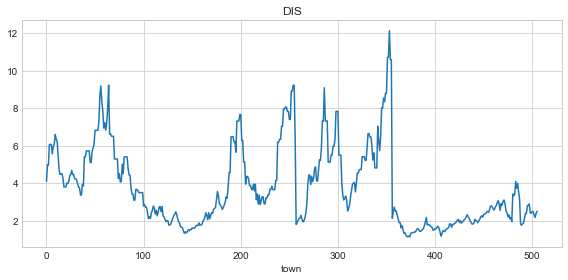

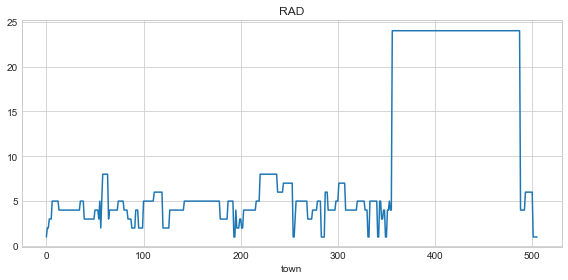

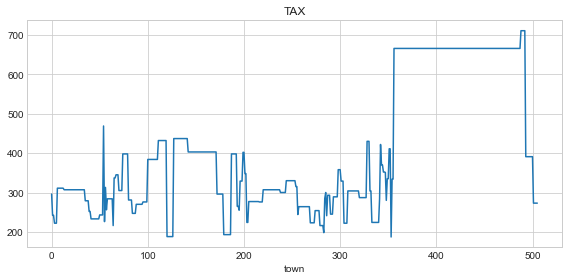

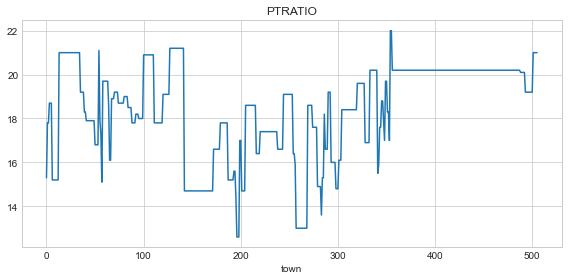

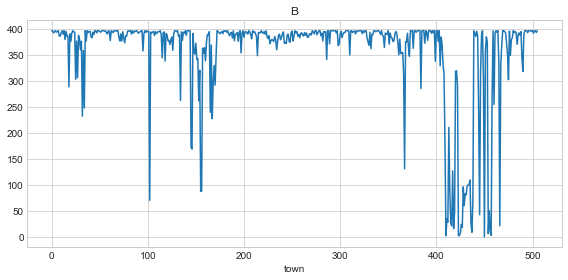

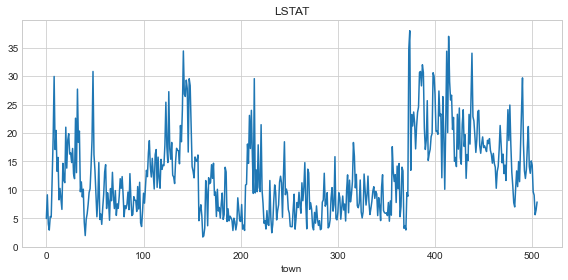

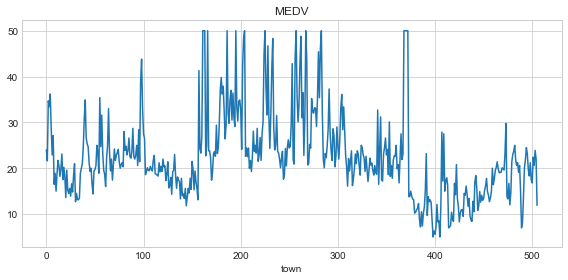

In [128]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('town')
    plt.tight_layout()

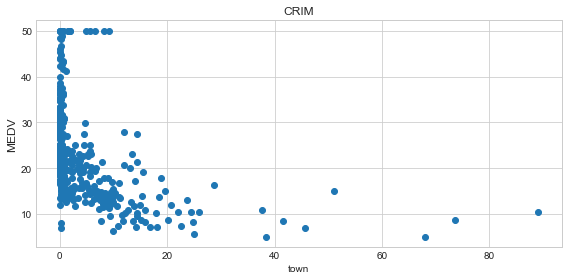

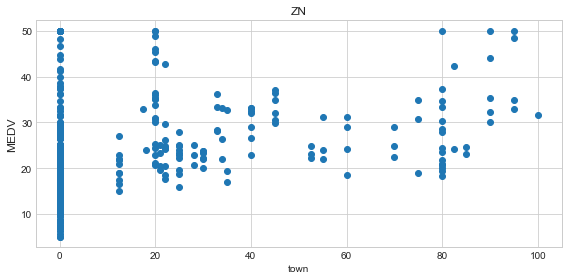

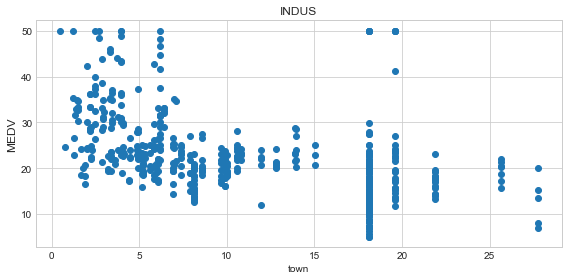

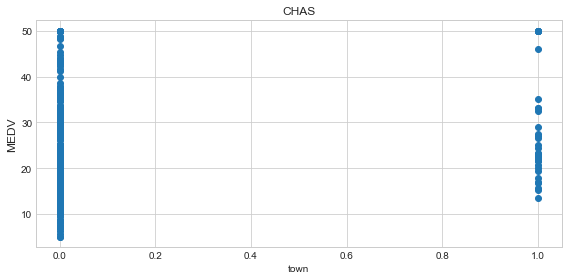

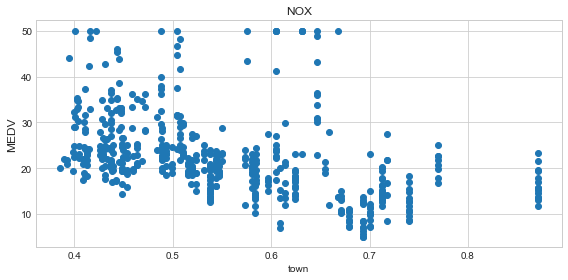

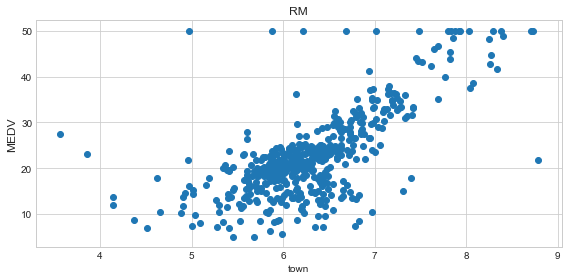

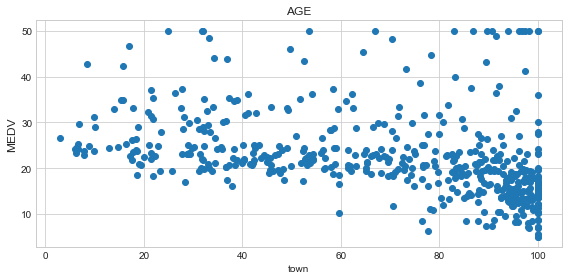

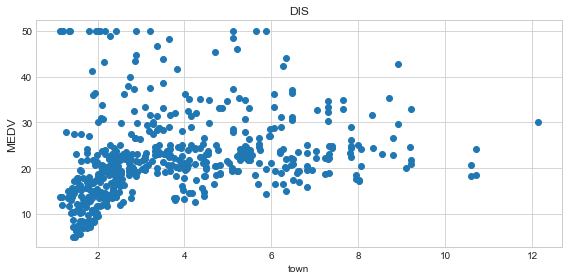

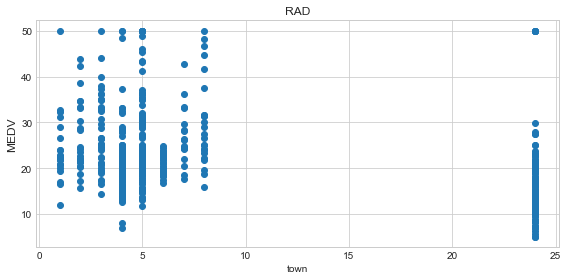

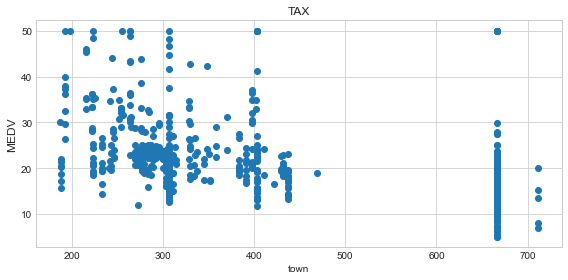

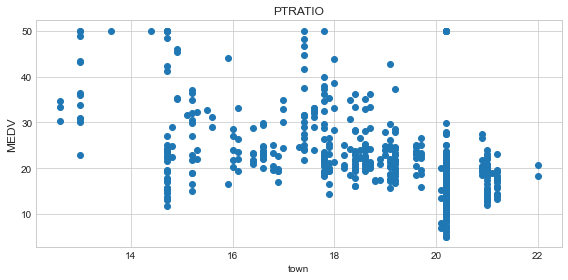

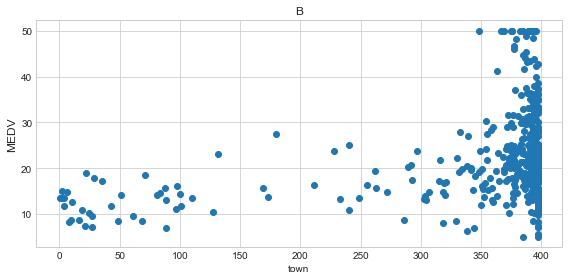

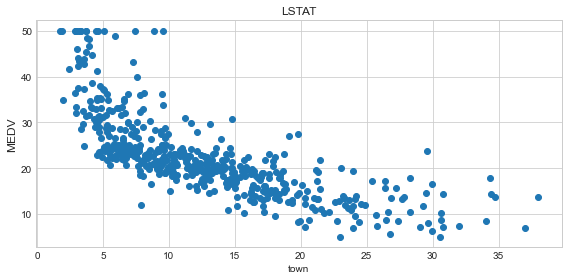

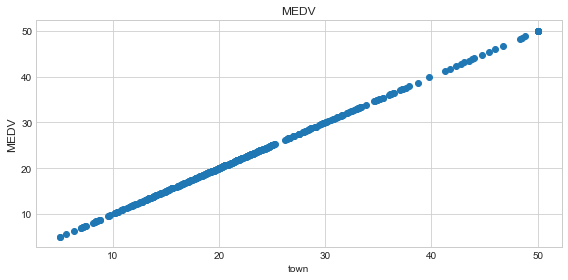

In [129]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col], boston_df['MEDV'])
    plt.title(col)
    plt.xlabel('town')
    plt.ylabel('MEDV',size=12)
    plt.tight_layout()

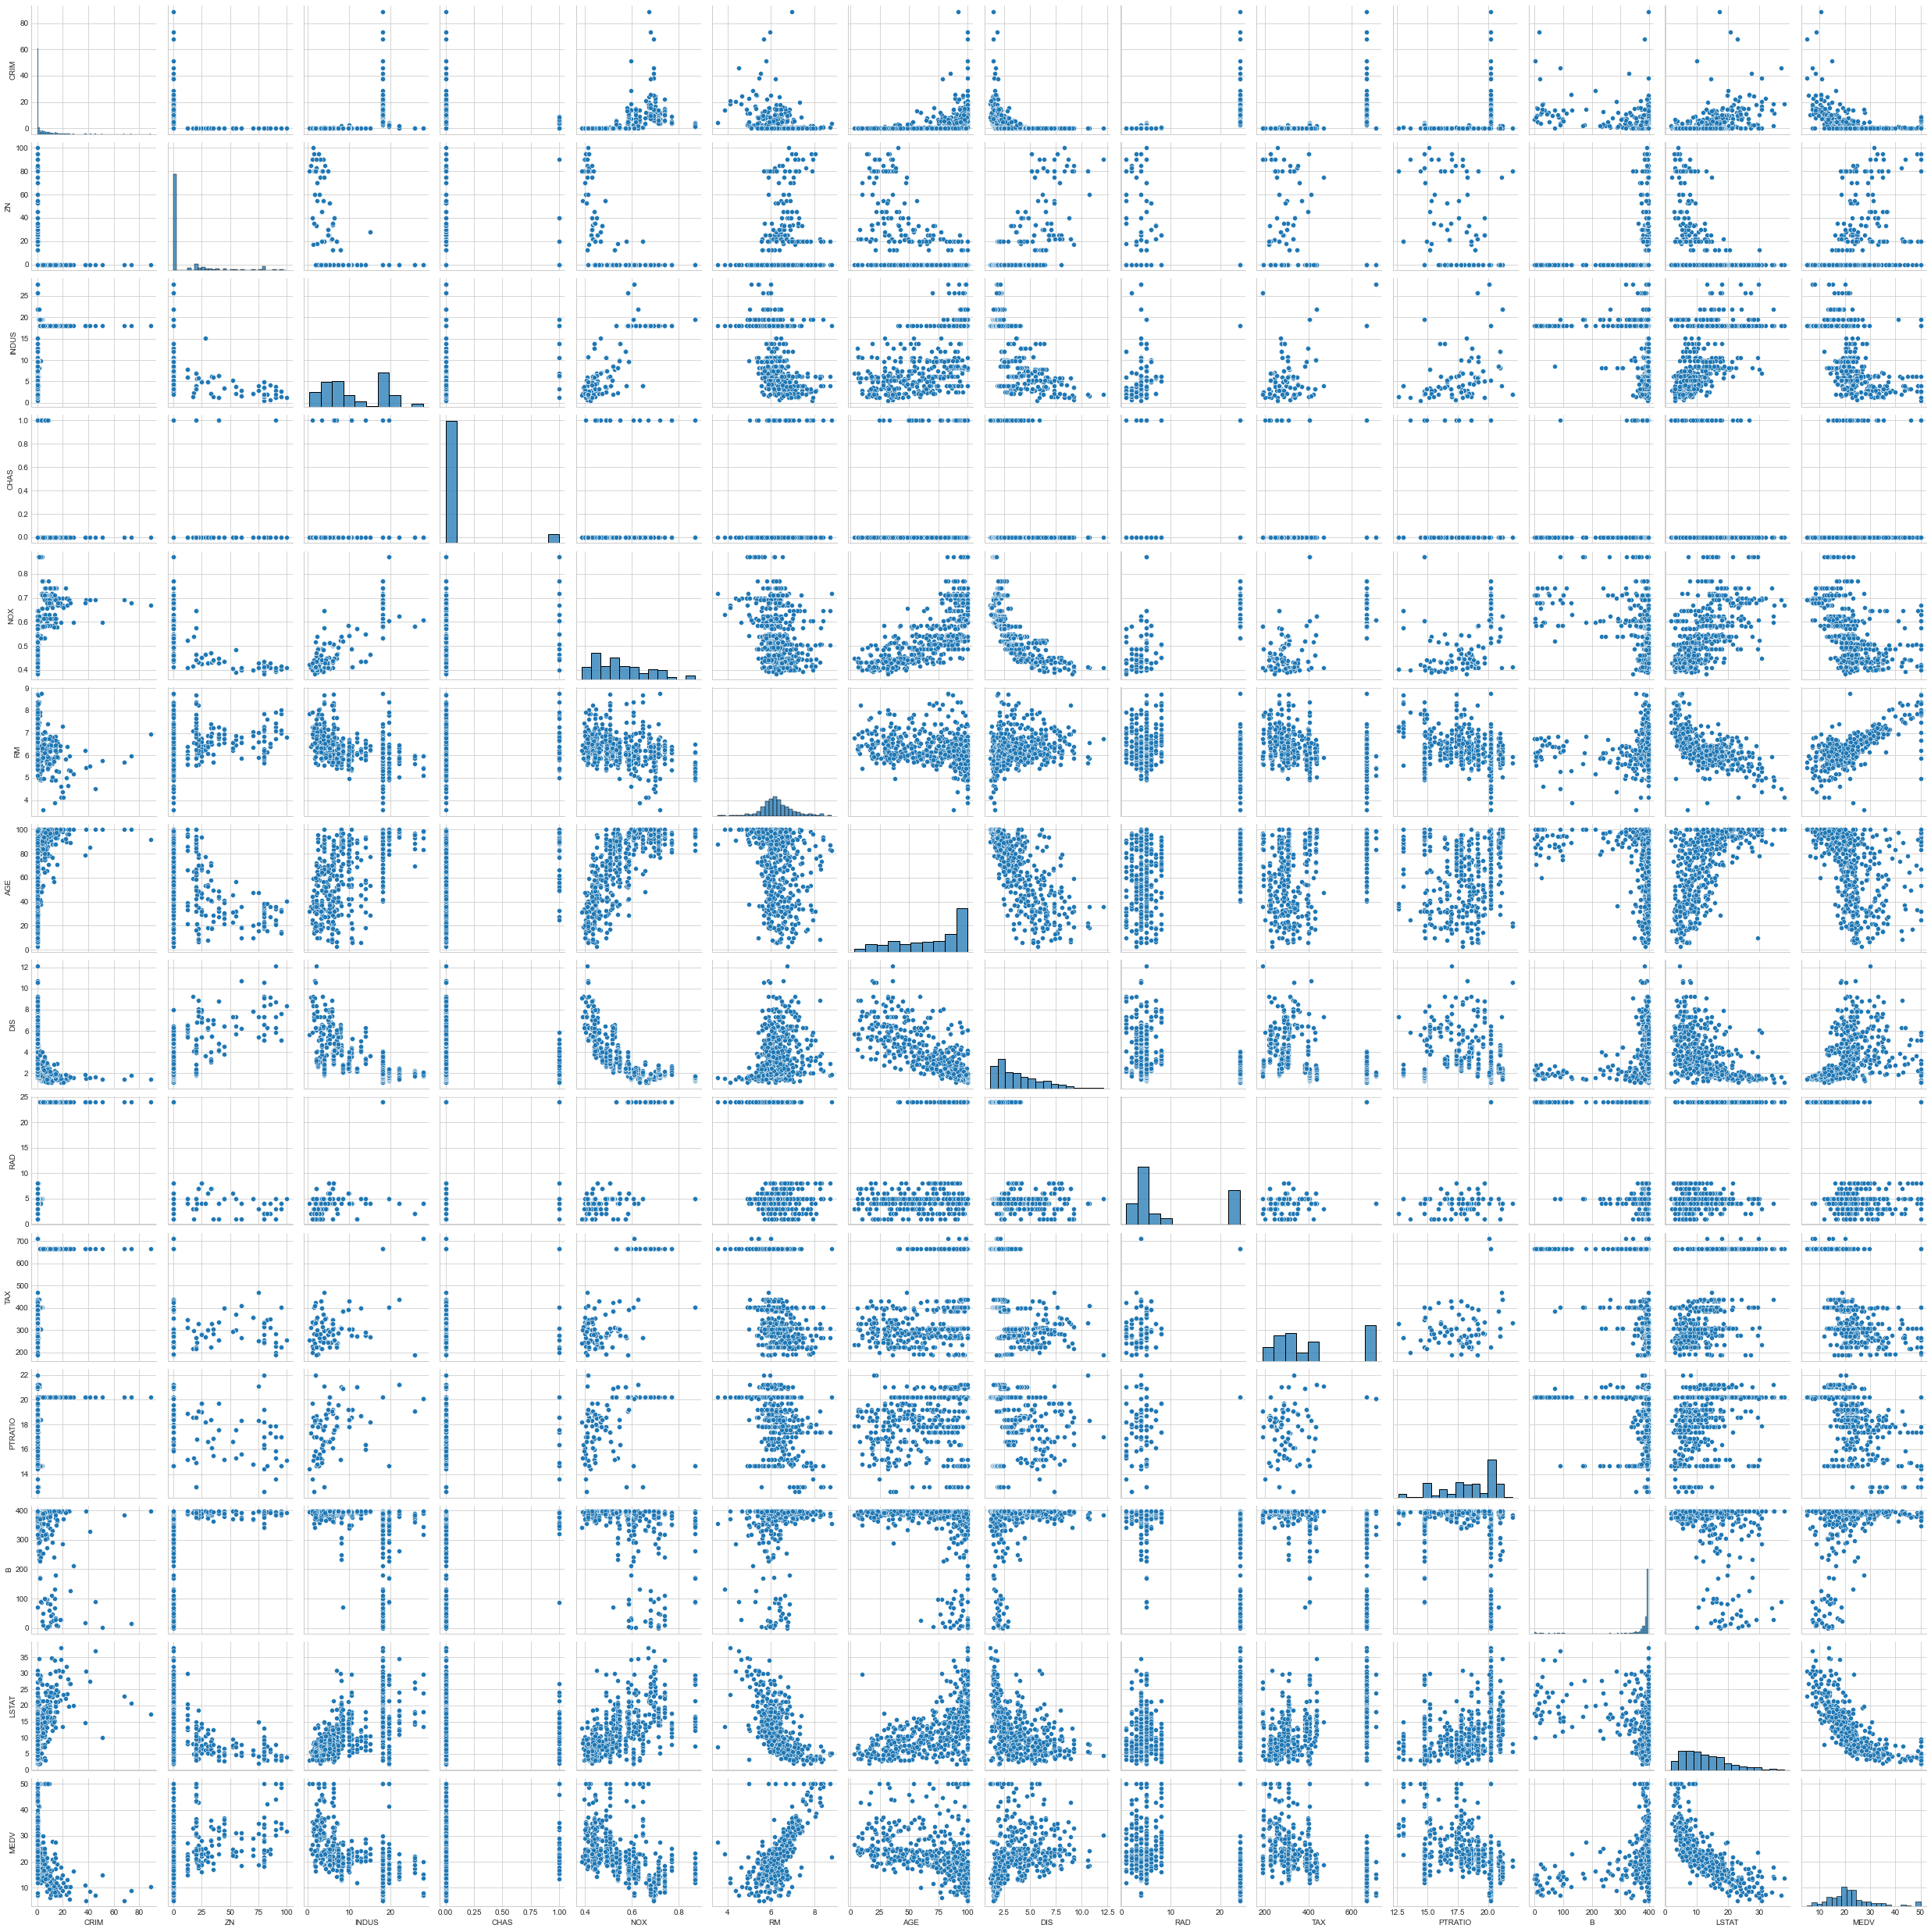

In [130]:
import seaborn as sns

sns.pairplot(boston_df)

#### 보스턴 주택 가격에 대한 선형 회귀

In [131]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=False)

In [132]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,test_size=0.2)

model.fit(X_train,y_train)

LinearRegression(normalize=False)

In [133]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.7495662759256423
평가 데이터 점수 : 0.6965934113446625


- 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용될 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
    - 이럴 경우, 테스트 세트를 여러개로 구성하여 교차 검증을 진행
- cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증
- 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [134]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE score : {}'.format(scores))
print('NMSE scores mean : {}'.format(scores.mean()))
print('NMSE scores std : {}'.format(scores.std()))

NMSE score : [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean : -34.70525594452481
NMSE scores std : 45.57399920030857


- 회귀모델의 검증을 위한 또다른 측정지표 중 하나로 결정계수(coefficient of determination, $R^2$) 사용

In [135]:
r2_scores = cross_val_score(model,boston.data,boston.target,cv=10,scoring='r2')

print('R2 score : {}'.format(r2_scores))
print('R2 scores mean : {}'.format(r2_scores.mean()))
print('R2 scores std : {}'.format(r2_scores.std()))

R2 score : [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean : 0.20252899006056085
R2 scores std : 0.5952960169512274


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두개의 속성 값을 통해 수식을 표현
- intercept_ : 추정된 상수항
- coef_ : 추정된 가중치 벡터

In [136]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = 38.964123860143744 
-0.10860296832780679 * x0
0.05007173129788838 * x1
0.05335780743560466 * x2
2.5653997080187723 * x3
-18.294069975591373 * x4
3.675514262513417 * x5
-0.004287258525046361 * x6
-1.4373924864428733 * x7
0.3130931099911035 * x8
-0.014572616672536494 * x9
-0.9810913700731009 * x10
0.008051370389234076 * x11
-0.5083404110389457 * x12


In [137]:
from sklearn.metrics import mean_squared_error, r2_score

# train
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2= r2_score(y_train, y_train_predict)

print('RMSE : {}'.format(rmse))
print('R2 : {}'.format(r2))

RMSE : 4.60312927447472
R2 : 0.7495662759256423


In [138]:
# test
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2= r2_score(y_test, y_test_predict)

print('RMSE : {}'.format(rmse))
print('R2 : {}'.format(r2))

RMSE : 5.031621316964422
R2 : 0.6965934113446625


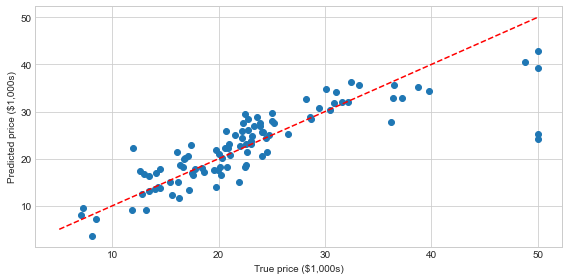

In [139]:
def plot_boston_price(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5,50],[5,50],'--r')
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()
    
predicted = model.predict(X_test)
expected = y_test

plot_boston_price(expected, predicted)

### 캘리포니아 주택 가격 데이터

|속성|설명|
|:---|:---|
|Medlnc|블록의 중간 소득|
|HouseAge|블록의 중간 주택 연도|
|AveRooms|평균 방 수|
|AveBedrms|평균 침실 수|
|Population|블록 내 거주중인 인구 수|
|AveOccup|평균 주택점유율|
|Latitude|주택 블록 위도|
|Longitude|주택 블록 경도|

In [140]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [141]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [142]:
california_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

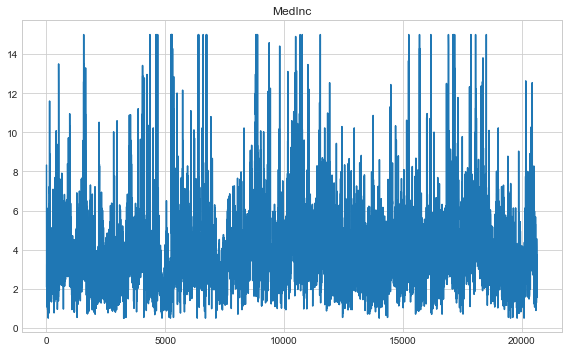

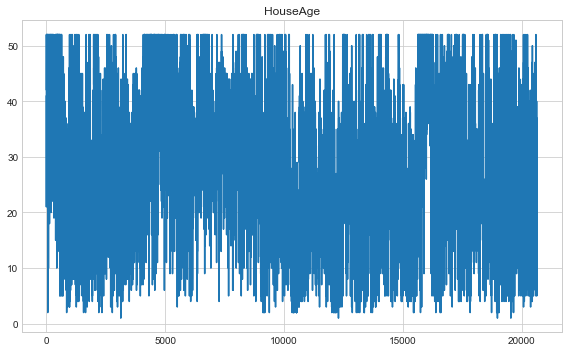

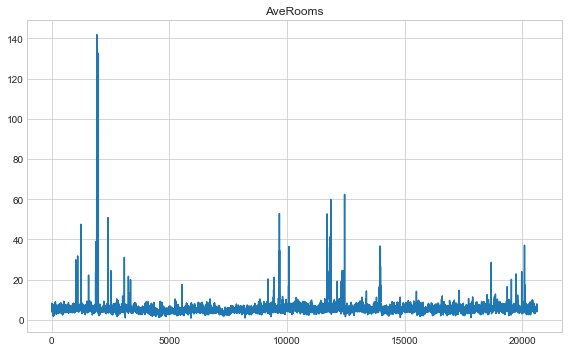

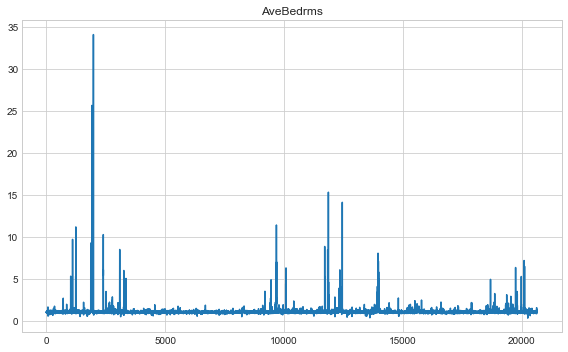

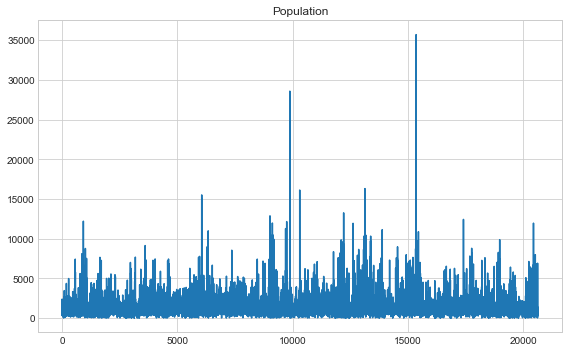

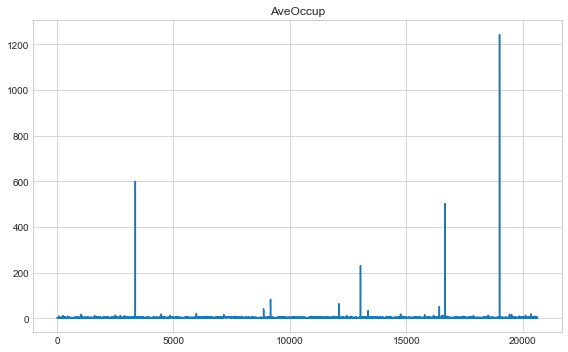

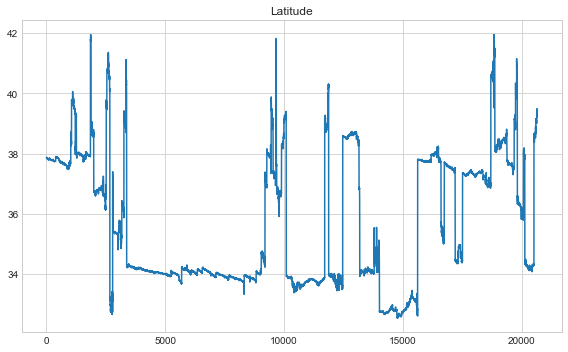

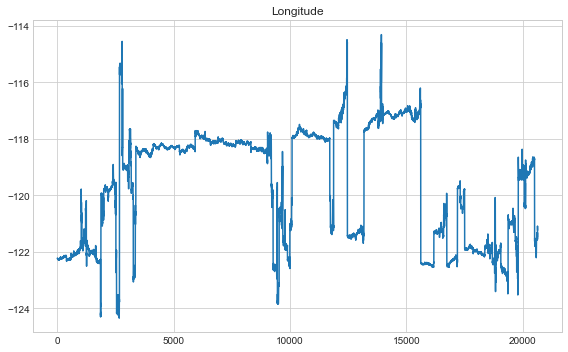

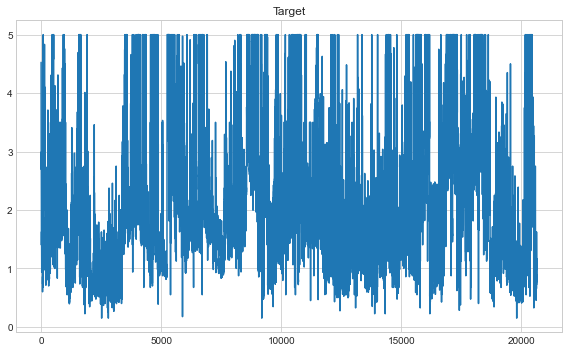

In [143]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.plot(california_df[col])
    plt.title(col)
    plt.tight_layout()

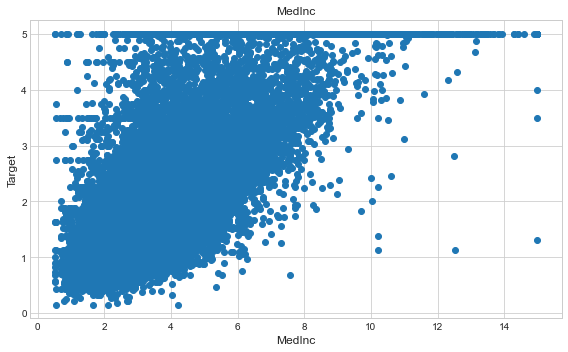

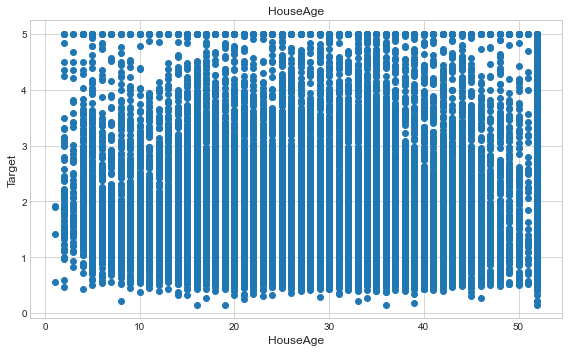

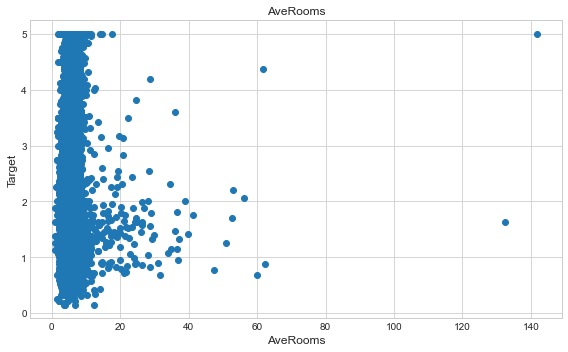

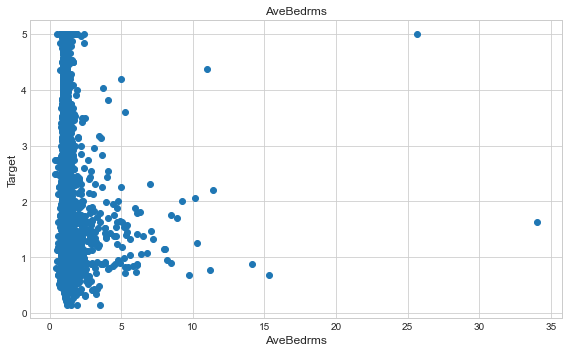

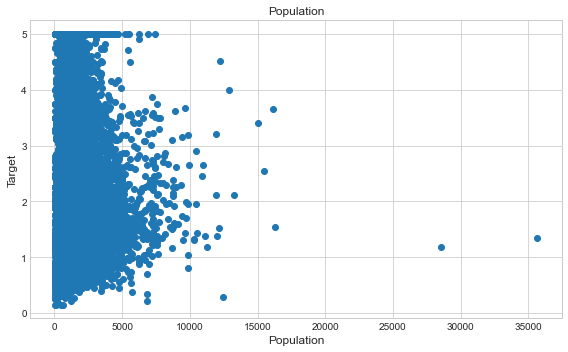

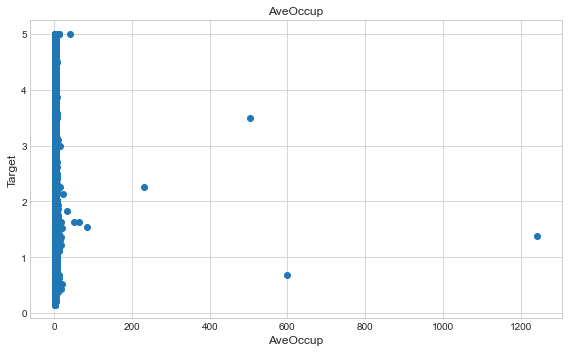

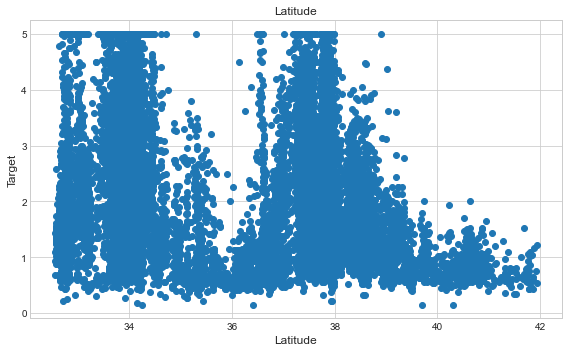

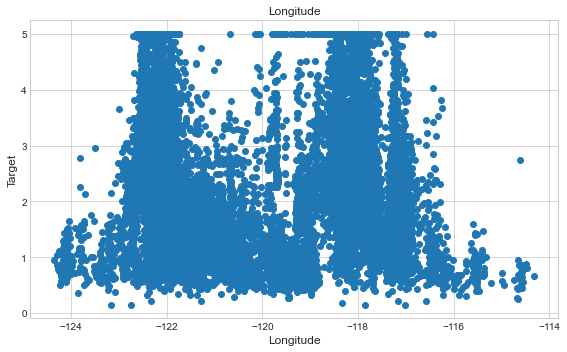

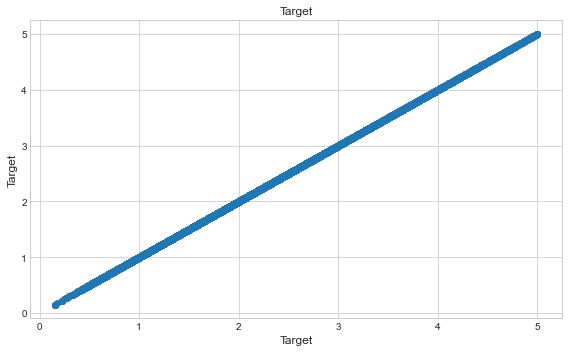

In [144]:
for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.scatter(california_df[col],california_df['Target'])
    plt.ylabel('Target',size=12)
    plt.xlabel(col,size=12)
    plt.title(col)
    plt.tight_layout()

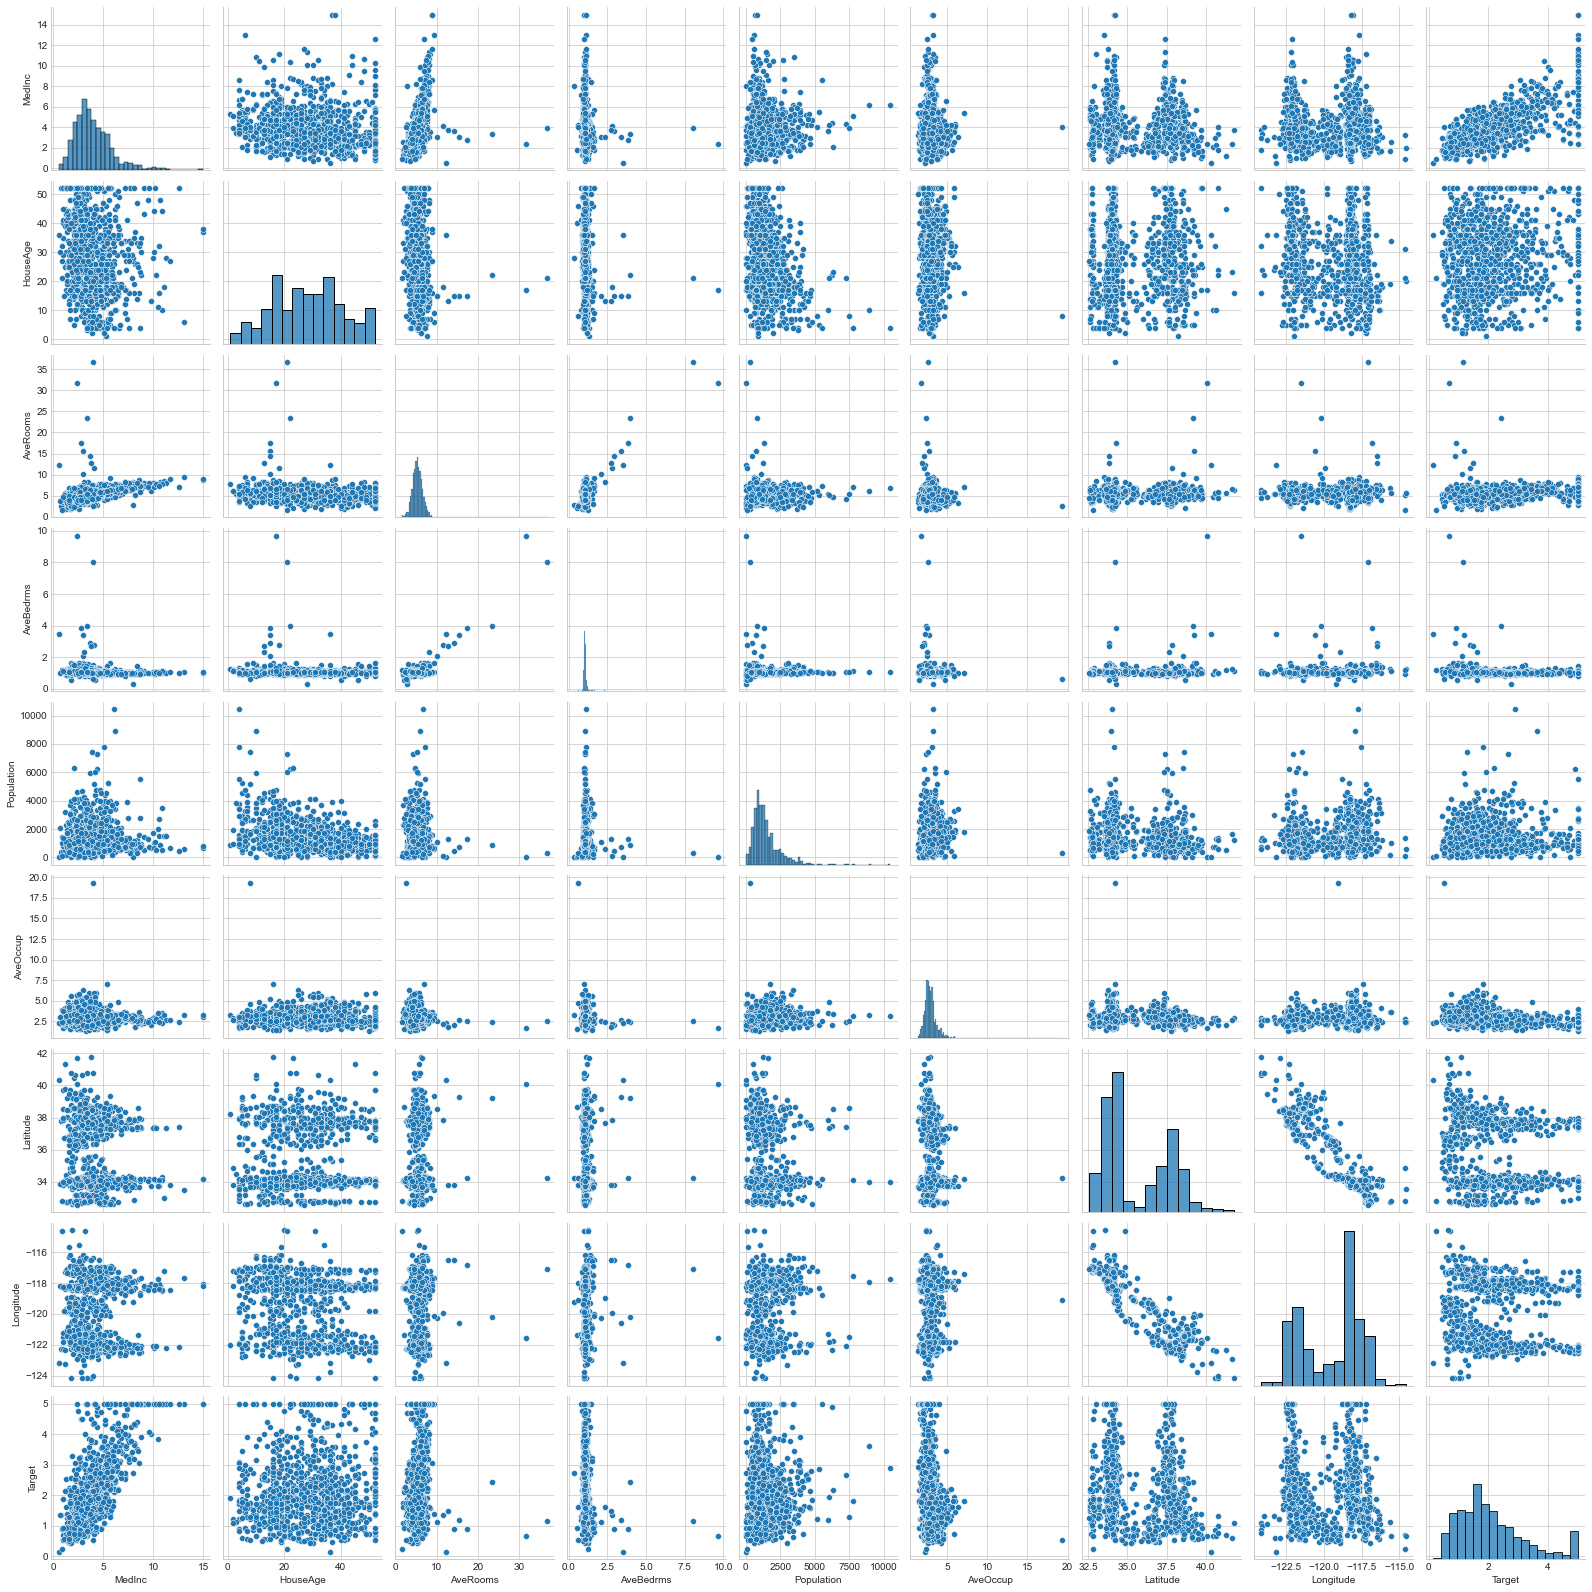

In [145]:
import seaborn as sns

sns.pairplot(california_df.sample(1000))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

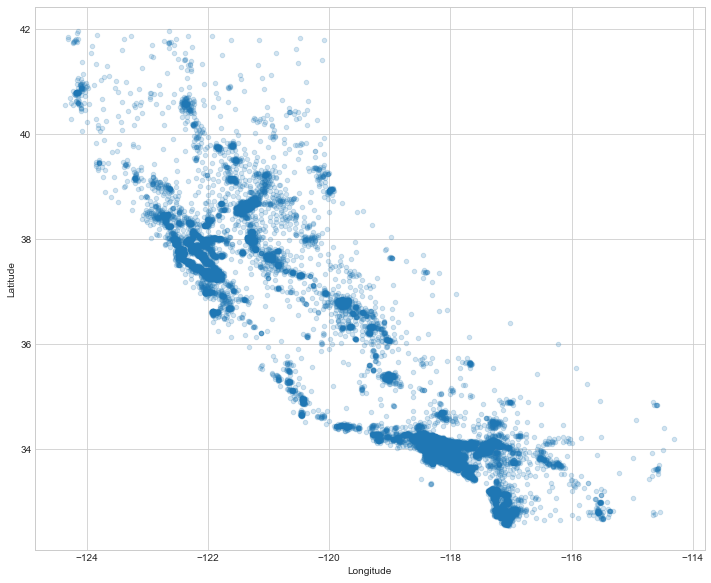

In [146]:
# 위치 데이터기 때문
california_df.plot(kind='scatter', x='Longitude',y='Latitude',alpha=0.2,figsize=(12,10))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

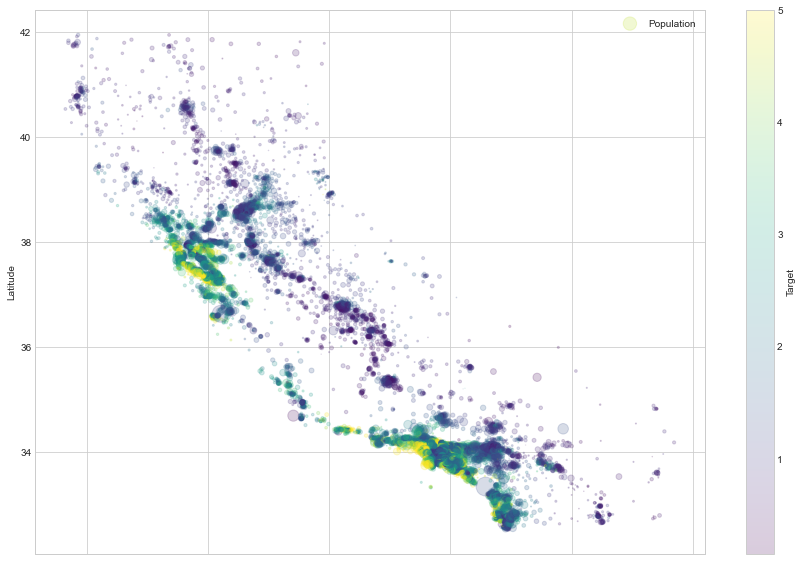

In [147]:
california_df.plot(kind='scatter', x='Longitude',y='Latitude',alpha=0.2,
                   s=california_df['Population']/100, label='Population',figsize=(15,10),
                  c='Target', cmap=plt.get_cmap('viridis'),colorbar=True)

#### 캘리포니아 주택 가격에 대한 선형 회귀

In [148]:
model=LinearRegression(normalize=True)

X_train,X_test,y_train,y_test=train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train,y_train)
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean: {}'.format(scores.mean()))
print('NMSE std : {}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 Score mean : {}'.format(r2_scores.mean()))

학습 데이터 점수 : 0.6078369998693967
평가 데이터 점수 : 0.5950269473381884
NMSE mean: -0.5509524296956646
NMSE std : 0.1928858295386516
R2 Score mean : 0.5110068610523766


In [149]:
print( 'y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = -37.01762908698724 
0.44741050311551517 * x0
0.009830460863930395 * x1
-0.12064865330776291 * x2
0.7730462372521184 * x3
-6.00466235882936e-07 * x4
-0.0040194285728119734 * x5
-0.41842775879257116 * x6
-0.4332546433467313 * x7


In [150]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 Scores : {}'.format(r2))

RMSE: 0.7241279964294731
R2 Scores : 0.6078369998693967


In [151]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Scores : {}'.format(r2))

RMSE: 0.7281390530010203
R2 Scores : 0.5950269473381884


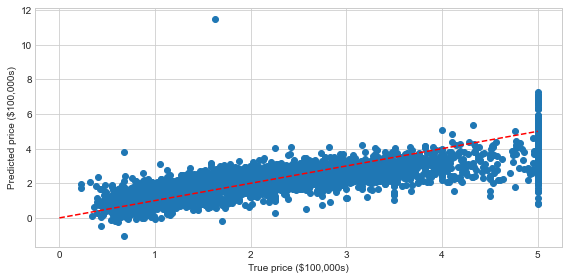

In [152]:
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected,predicted)
    plt.plot([0,5],[0,5],'--r')
    plt.xlabel('True price ($100,000s)')
    plt.ylabel('Predicted price ($100,000s)')
    plt.tight_layout()
    
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)
- 릿지 회귀는 선형 회귀를 개선한 선형 모델
- 릿지 회귀는 선형 회귀와 비슷하지만, **가중치의 절대값을 최대한 작게 만든다는 것**이 다름
- 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
- 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
- 다중공선성 문제는 두 특성이 일치에 가까울 정도롤 관련성(상관관계)이 높을 경우 발생
- 릿지 회귀는 다음과 같은 함수를 최소화하는 파라미터 w를 찾음

$$ RidgeMSE = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_i})^2 + \alpha\sum_{i=1}^Pw_i^2 $$

- $\alpha$ : 사용자가 지정하는 매개변수
- $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

### 보스턴 주택 가격에 대한 릿지 회귀

In [153]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [154]:
X,y = load_boston(return_X_y=True) # .data, .target 알아서 구별해줌

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [155]:
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2)

In [156]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.7292055780442875
평가 데이터 점수: 0.7437564349981088


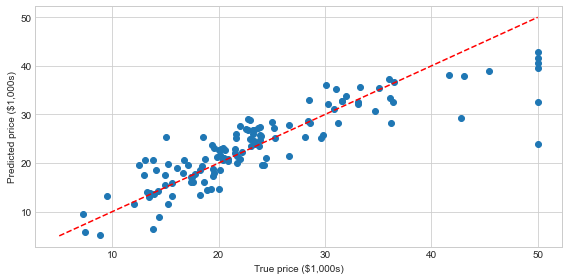

In [157]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_price(expected, predicted)

- 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
- 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음
- 일반화 성능에 영향을 주는 매개변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [158]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test= train_test_split(california.data, california.target, test_size=0.2)

In [159]:
model = Ridge(alpha=0.05)
model.fit(X_train,y_train)

Ridge(alpha=0.05)

In [160]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.6066668640168877
평가 데이터 점수: 0.6032905072120078


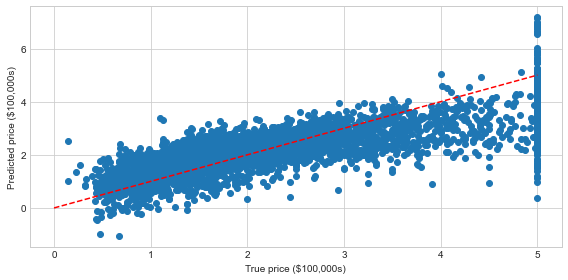

In [161]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 라쏘 회귀(Lasso Regression)
- 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
- 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 w를 찾음

$$ LassoMSE = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_i})^2 + \alpha\sum_{i=1}^P|w_i^2| $$

- 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [162]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [163]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [164]:
model = Lasso(alpha=0.001)
model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [165]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.7270584383365587
평가 데이터 점수: 0.7819735330141413


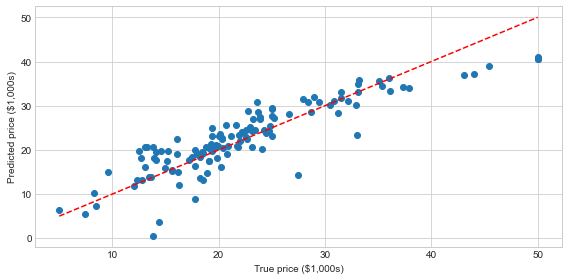

In [166]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_price(expected, predicted)

### 캘리포니아 주택 각겨에 대한 라쏘 회귀

In [167]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test= train_test_split(california.data, california.target, test_size=0.2)

In [168]:
model = Lasso(alpha=0.001)
model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [169]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.6058852900393542
평가 데이터 점수: 0.6070501802025352


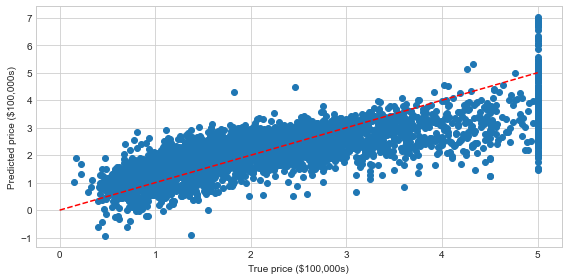

In [170]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 신축망 (Elastic-Net)
- 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
- 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
- 데이터 특성이 많거나 서로 상관관계가 높은 특성이 존재할 때의 두 모델보다 좋은 성능을 보여줌
- 신축망은 다음과 같은 함수를 최소화 하는 파라미터 w를 찾음

$$ ElasticMSE = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_i})^2 + \alpha p \sum_{i=1}^P|w_i^2| + \alpha(1-p) \sum_{i=1}^Pw_i^2 $$

- $\alpha$ : 규제의 강도를 조절하는 매개변수
- p : 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [171]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [172]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [173]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [174]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.7366131745723907
평가 데이터 점수: 0.7167281896796764


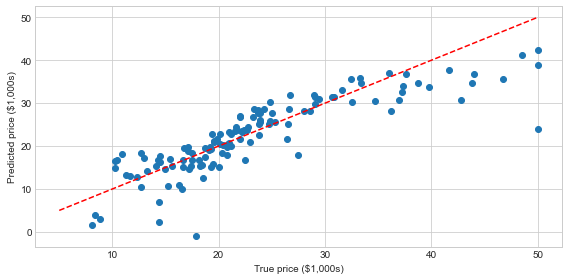

In [175]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_price(expected, predicted)

### 캘리포니아 주택 가격에 대한 신축망

In [176]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test= train_test_split(california.data, california.target, test_size=0.2)

In [177]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [178]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.6053760340180574
평가 데이터 점수: 0.5964544993838827


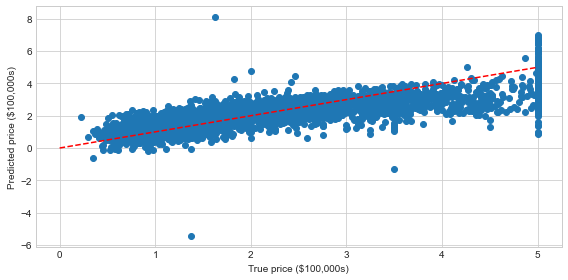

In [179]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 직교 정합 추구 (Orthogonal Matchin Pursuit)
- 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법
- 직교 정합 추구 방법은 다음을 만족하는 파라미터 w를 찾는 것이 목표

$$ \arg min\sum_{i=1}^N(y_i-\hat{y_i})^2 \;subject\,to\ ||w||_{0} \leq k  $$

- $||w||_{0}$ : 가중치 벡터 w에서 0이 아닌 값의 개수

- **직교 정합 추구 방법은 가중치 벡터 w에서 0이 아닌 값이 k개 이하가 되도록 훈련됨**
- **이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음**

### 보스턴 주택 가격에 대한 직교 정합 추구

In [180]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [181]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [182]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [183]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7) # 속성 값 몇개?
model.fit(X_train,y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=7)

In [184]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.7371166867480272
평가 데이터 점수: 0.6710974859605108


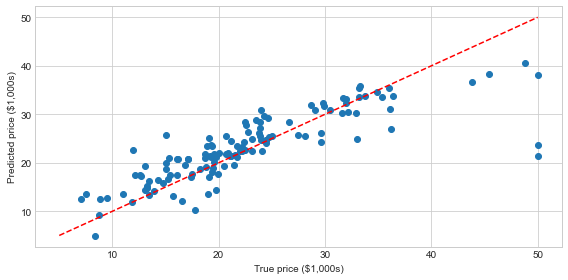

In [185]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_price(expected, predicted)

- 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능 

$$  \arg min||w||_{0} \;subject\,to\ \sum_{i=1}^N(y_i-\hat{y_i})^2 \leq tol  $$

- 위의 식을 통해서 직교 정합 추구 방법을 y와 $\hat{y}$ 사이의 오차 제곱 합을 tol 이하로 하면서 $||w||_{0}$를 최소로 하는 모델로 대체 가능

In [186]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train,y_train)

OrthogonalMatchingPursuit(tol=1.0)

In [187]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.7578098269602092
평가 데이터 점수: 0.6792951002776745


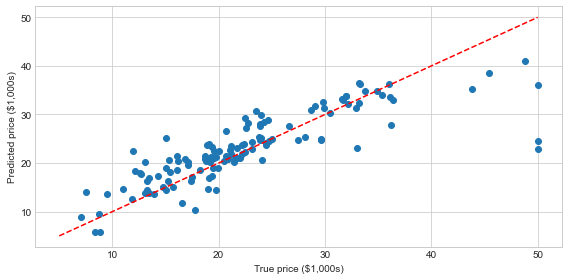

In [188]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_price(expected, predicted)

### 캘리포니아 주택 가격에 대한 직교 정합 추구

In [189]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test= train_test_split(california.data, california.target, test_size=0.2)

In [190]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train,y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [191]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.5971235389446842
평가 데이터 점수: 0.6051513613654087


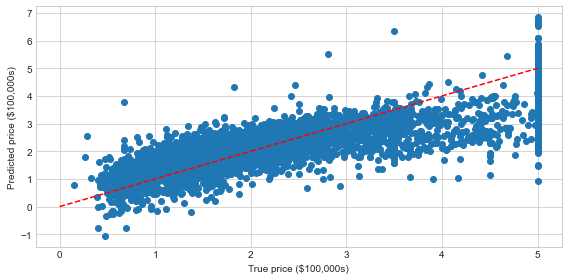

In [192]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

In [193]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train,y_train)

OrthogonalMatchingPursuit(tol=1.0)

In [194]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.6038920774897807
평가 데이터 점수: 0.6146975818001204


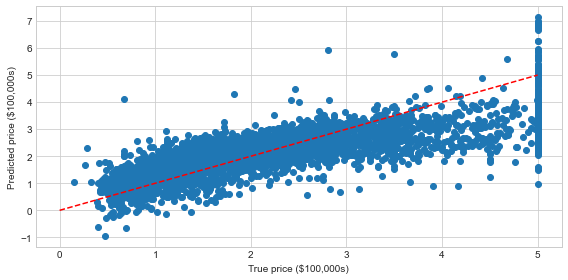

In [195]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 다항 회귀 (Polynormial Regression)
- **입력 데이터를 비선형 변환 후 사용하는 방법**
- 모델 자체는 선형 모델

$$ \hat{y} = w_1x_1 + w_2x_2 +w_3x_3 + w_4x_1^2 + w_5x_2^2 $$

- 차수가 높아질수록 더 복잡한 데이터 학습 가능

### 보스턴 주택 가격에 대한 다항 회귀

In [196]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [197]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123) # 고정된 값 

In [198]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [199]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9346787783950693
평가 데이터 점수: 0.8257864718002368


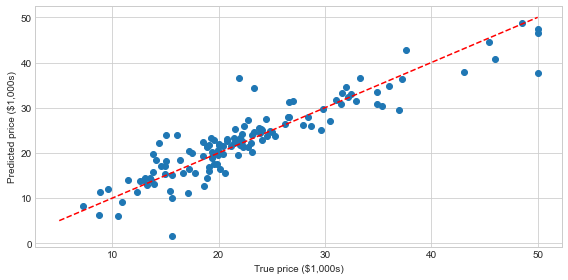

In [200]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_price(expected, predicted)

### 캘리포니아 주택 가격에 대한 다항 회귀

In [201]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test= train_test_split(california.data, california.target, test_size=0.2)

In [202]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [203]:
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.6862301788545875
평가 데이터 점수: 0.6655383579568478


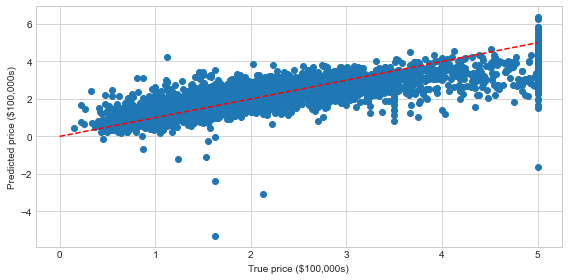

In [204]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)